In [218]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('xls/Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [219]:
df_can = df.drop(['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],axis=1)

df_can.rename(columns={'OdName':'Country'},inplace=True)

df_can.head()


,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1


**Question:** Visualize the top 5 countries that contribued the most immigrants to Canada

In [220]:
df_can.set_index(['Country'],inplace=True)

In [221]:
df_can_aux = df_can.copy()

df_can_aux['Total'] = df_can_aux.sum(axis=1)

df_filter = df_can_aux.sort_values(by='Total',ascending=False).head(5)

top5 = df_filter.index

In [222]:
df_trans = df_can.transpose()
df_trans.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44
1984,71,0,63,0,0,4,42,237,0,317,...,6661,90,0,0,142,7583,0,0,16,32


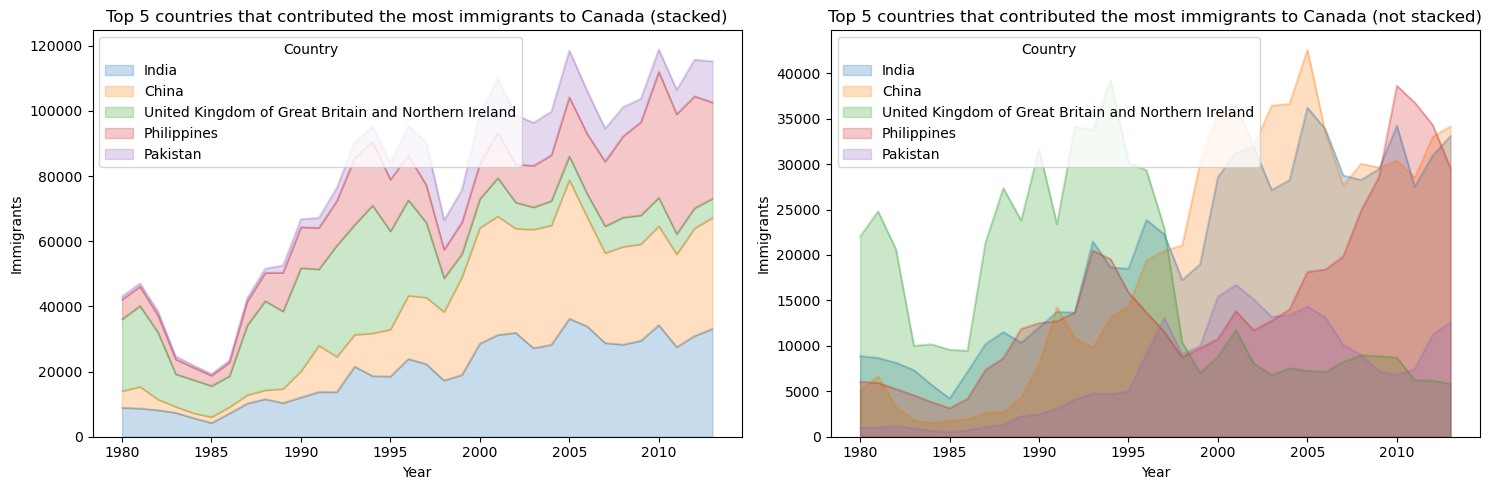

In [226]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot stacked area plot on the first subplot
df_trans[top5].plot(kind='area', alpha=0.25, stacked=True, ax=ax1)
ax1.set_title('Top 5 countries that contributed the most immigrants to Canada (stacked)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Immigrants')

# Plot regular area plot on the second subplot
df_trans[top5].plot(kind='area', alpha=0.25, stacked=False, ax=ax2)
ax2.set_title('Top 5 countries that contributed the most immigrants to Canada (not stacked)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Immigrants')

# Show the plots
plt.tight_layout()
plt.show()

### Histogram
**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [228]:
df_can[2013]

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
                  ... 
Viet Nam          2112
Western Sahara       0
Yemen              217
Zambia              59
Zimbabwe           407
Name: 2013, Length: 195, dtype: int64

In [235]:
#By default, the histrogram method breaks up the dataset into 10 bins
#178 countries contributed between 0 to 3412.9 immigrants
#11 countries contributed between 3412.9 to 6825.8 immigrants
#1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

import numpy as np

count, bin_edges = np.histogram(df_can[2013])

print('Count: ', count, '\nRange:', bin_edges)

Count:  [178  11   1   2   0   0   0   0   1   2] 
Range: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


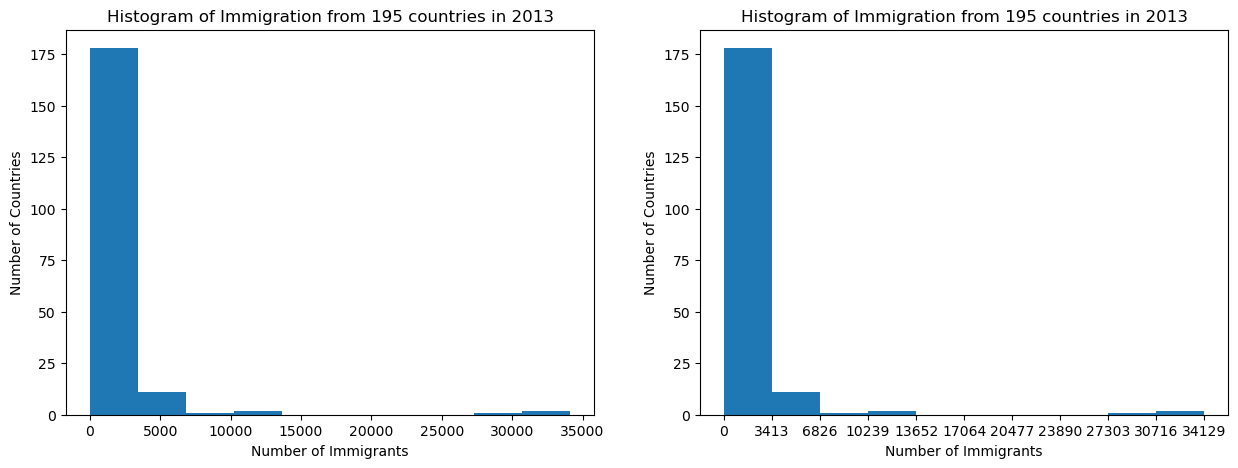

In [244]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5)) #1 row and 2 columns

df_can[2013].plot(kind='hist', ax = ax1)
ax1.set_title('Histogram of Immigration from 195 countries in 2013')
ax1.set_ylabel('Number of Countries')
ax1.set_xlabel('Number of Immigrants')

df_can[2013].plot(kind='hist', xticks = bin_edges, ax=ax2)
ax2.set_title('Histogram of Immigration from 195 countries in 2013')
ax2.set_ylabel('Number of Countries')
ax2.set_xlabel('Number of Immigrants')

plt.tight_layout() #improve the layout of the subplots
plt.show()

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

Text(0, 0.5, 'Number of Immigrants')

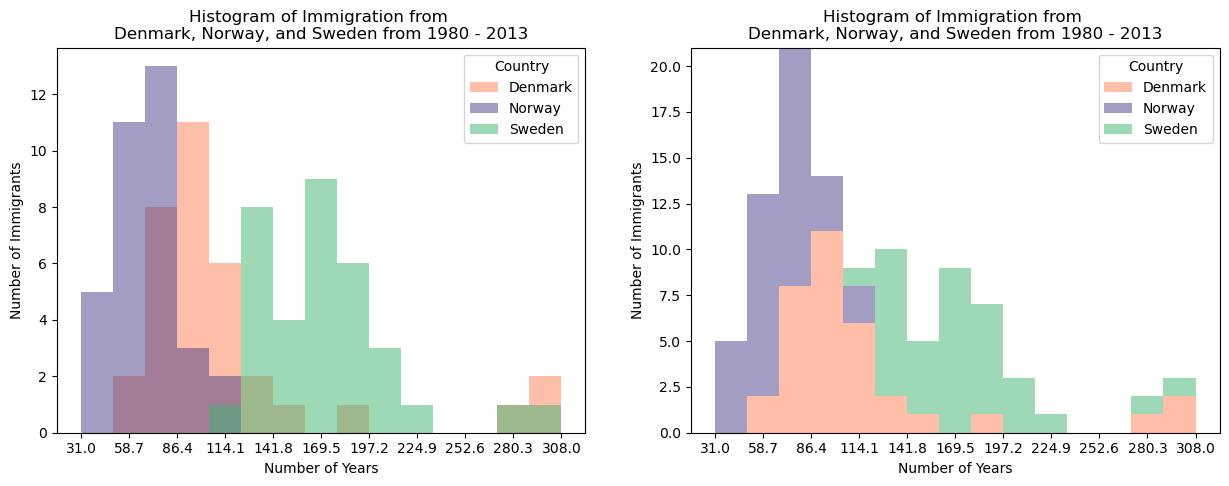

In [265]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

new_filter = ['Denmark','Norway','Sweden']

count, bin_edges1=np.histogram(df_trans[new_filter])

df_trans[new_filter].plot(kind='hist', alpha=0.5, bins=15, xticks=bin_edges1
                         ,color=['coral', 'darkslateblue', 'mediumseagreen'], ax=ax1)
ax1.set_title('Histogram of Immigration from \nDenmark, Norway, and Sweden from 1980 - 2013')
ax1.set_xlabel('Number of Years')
ax1.set_ylabel('Number of Immigrants')

df_trans[new_filter].plot(kind='hist', alpha=0.5, bins=15, xticks=bin_edges1, stacked=True
                         ,color=['coral', 'darkslateblue', 'mediumseagreen'], ax=ax2)
ax2.set_title('Histogram of Immigration from \nDenmark, Norway, and Sweden from 1980 - 2013')
ax2.set_xlabel('Number of Years')
ax2.set_ylabel('Number of Immigrants')

### BarChart
**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

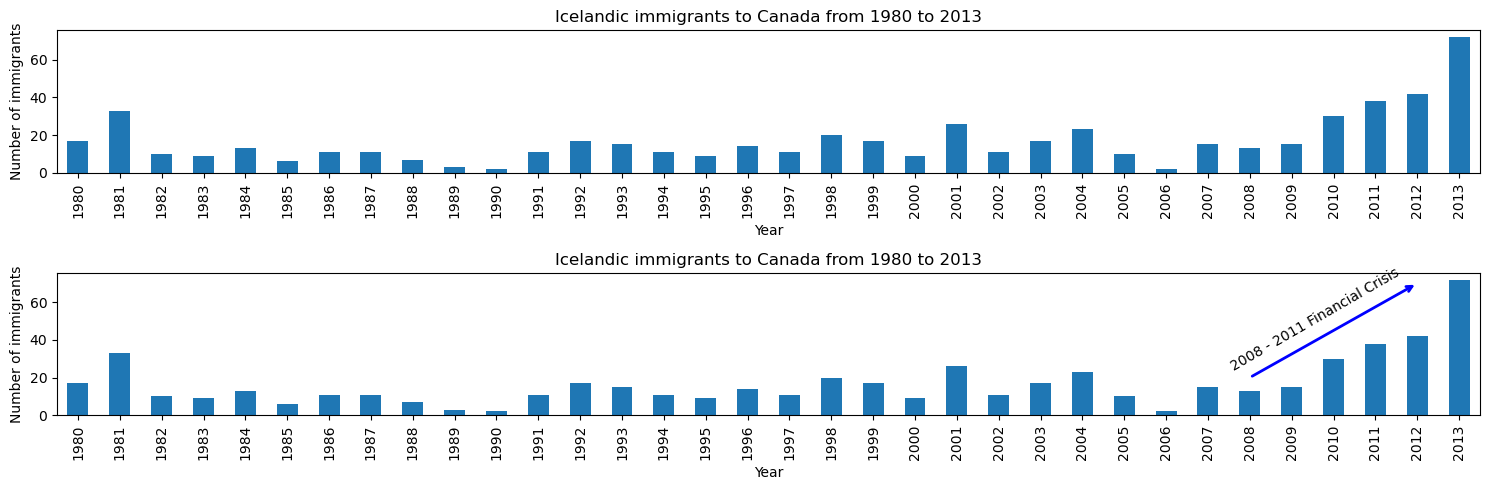

In [289]:

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5))

df_trans['Iceland'].plot(kind='bar',rot=90, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of immigrants')
ax1.set_title('Icelandic immigrants to Canada from 1980 to 2013')

df_trans['Iceland'].plot(kind='bar',rot=90, ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of immigrants')
ax2.set_title('Icelandic immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(27.5, 22),  # start the text at at point (year 2008 , pop 30)
             rotation=30,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.tight_layout()
plt.show()